# Análisis Exploratorio de Datos (EDA)

Vamos a realizar un análisis exploratorio completo de la base de datos tratada.

**Objetivos:**
- Entender la distribución de los datos.
- Analizar el comportamiento de las publicaciones.
- Detectar patrones, outliers y relaciones.
- Enfocar las futuras decisiones de modelado y su posterior visualización.

## Importación de librerías

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid") # fondo blanco con cuadrícula
plt.rcParams['figure.figsize'] = (10, 6) # tamaño del los gráficos

## Carga de datos y revisión inicial

In [5]:
processed_path = "/Users/elena/Downloads/Data_science/proyectos/proyecto_I/interacciones-Facebook/data/dataset_limpio.csv"
df = pd.read_csv(processed_path, sep=";")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 18 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   page_total_likes                                                     500 non-null    int64  
 1   type                                                                 500 non-null    object 
 2   post_month                                                           500 non-null    int64  
 3   post_weekday                                                         500 non-null    int64  
 4   post_hour                                                            500 non-null    int64  
 5   paid                                                                 500 non-null    float64
 6   lifetime_post_total_reach                                            500 non-null    int64  
 7   lifetime

,page_total_likes,type,post_month,post_weekday,post_hour,paid,lifetime_post_total_reach,lifetime_post_total_impressions,lifetime_engaged_users,lifetime_post_consumers,lifetime_post_consumptions,lifetime_post_impressions_by_people_who_have_liked_your_page,lifetime_post_reach_by_people_who_like_your_page,lifetime_people_who_have_liked_your_page_and_engaged_with_your_post,comment,like,share,total_interactions
0,139441,Photo,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [6]:
# por alguna razón, las variables categóricas no se leean como tipo "category", aunque en etl sí que quedaron de ese modo
# volvemos a cambiarlas
cat_columns = ['post_month', 'post_weekday', 'post_hour', 'paid']
for col in cat_columns:
    df[col] = df[col].astype('category')


In [7]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 18 columns):
 #   Column                                                               Non-Null Count  Dtype   
---  ------                                                               --------------  -----   
 0   page_total_likes                                                     500 non-null    int64   
 1   type                                                                 500 non-null    object  
 2   post_month                                                           500 non-null    category
 3   post_weekday                                                         500 non-null    category
 4   post_hour                                                            500 non-null    category
 5   paid                                                                 500 non-null    category
 6   lifetime_post_total_reach                                            500 non-null    int64   
 7  

,page_total_likes,type,post_month,post_weekday,post_hour,paid,lifetime_post_total_reach,lifetime_post_total_impressions,lifetime_engaged_users,lifetime_post_consumers,lifetime_post_consumptions,lifetime_post_impressions_by_people_who_have_liked_your_page,lifetime_post_reach_by_people_who_like_your_page,lifetime_people_who_have_liked_your_page_and_engaged_with_your_post,comment,like,share,total_interactions
0,139441,Photo,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


## Análisis univariado de las variables categóricas

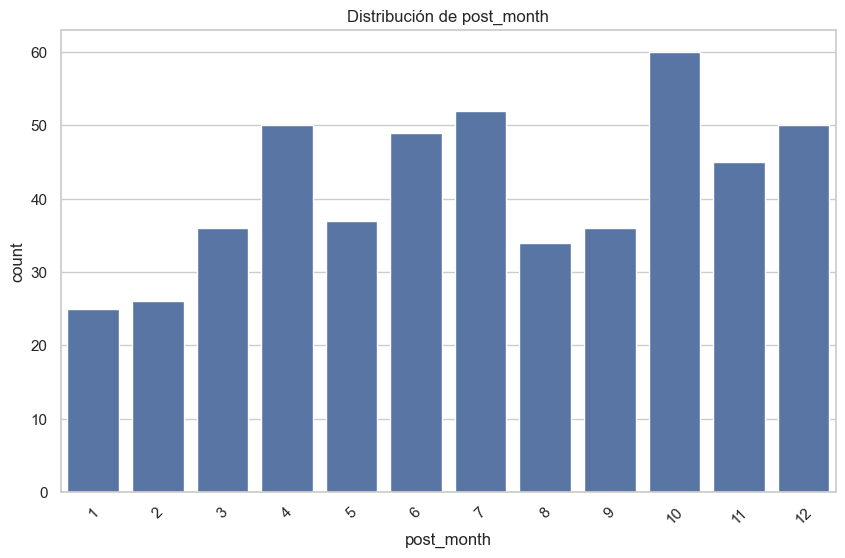

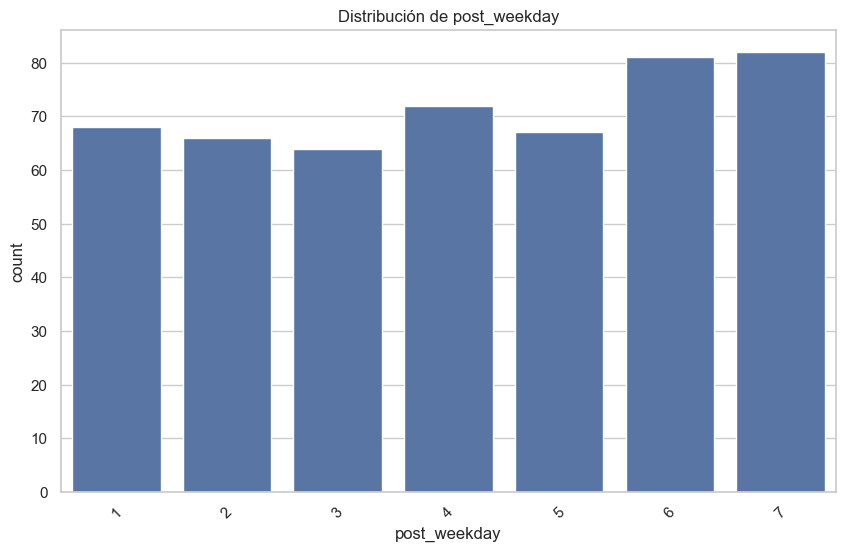

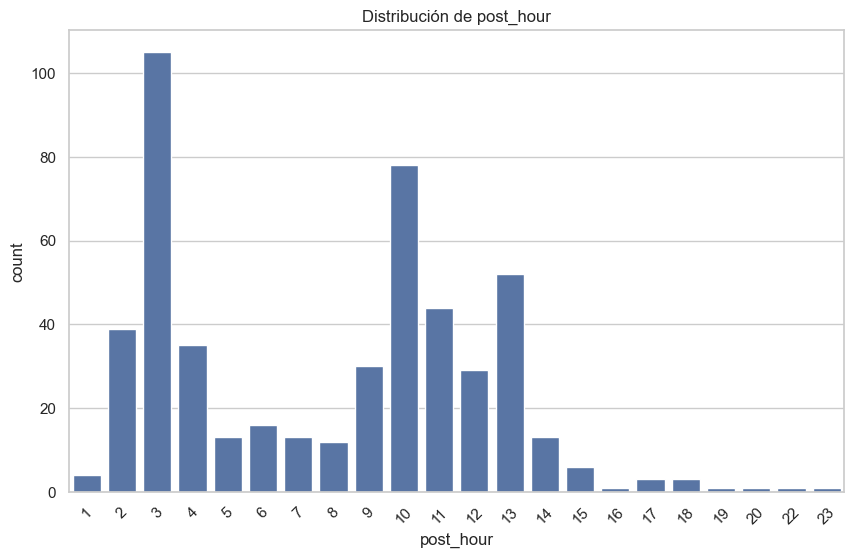

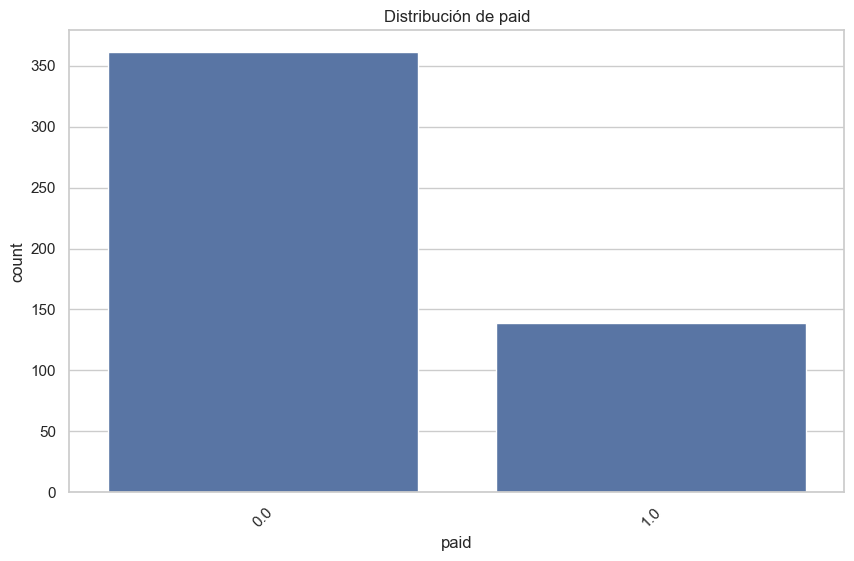

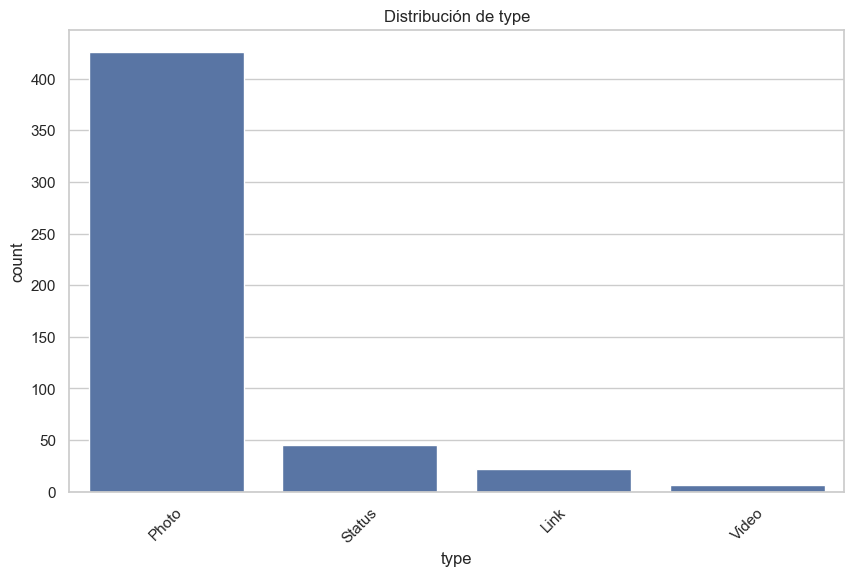

In [11]:
cat_cols = cat_columns + ['type']
for col in cat_cols:
    sns.countplot(data=df, x=col)
    plt.title(f"Distribución de {col}")
    plt.xticks(rotation=45)
    plt.show()

**`post_month` – Distribución de publicaciones por mes**
- Octubre (10) es el mes con mayor número de publicaciones, seguido de julio (7) y abril (4).
- Enero (1) y febrero (2) son los meses con menor actividad.

---

**`post_weekday` – Distribución de publicaciones por día de la semana**
- La distribución es bastante equilibrada, pero:
    - El fin de semana: sábado (6) y domingo (7) tienen la mayor cantidad de publicaciones.
    - Entre semana hay una ligera disminución, especialmente los martes y miércoles.
- Es posible que haya una estrategia de publicar más los fines de semana, probablemente por mayor presencia del público en las redes.

---

**`post_hour` – Distribución de publicaciones por hora del día**
- Se detectan dos picos de actividad principales:
    - A las 3h y 10h. Ese pico a las 3 de la madrugada nos parece extraño.
- Hay mayor frecuencia de publicaciones entre las 9h y 13h, lo cual puede responder a ventanas horarias de mayor visibilidad: el horario de mañana, donde se encuentra el pico de las 10 am comentado anteriormente.
- Muy pocas publicaciones se hacen en la tarde-noche, especialmente después de las 16h.

---

**`paid` – Distribución de publicaciones promocionadas vs. orgánicas**
- La mayoría de publicaciones son orgánicas (unas 360), mientras que las promocionadas son minoría (unas 140).

---

**`type` – Distribución por tipo de publicación**
- El 85% de las publicaciones son del tipo Photo. 
- Otros tipos (Status, Link, Video) tienen muy poca representación.
- ¿Puede ser este sesgo hacia imágenes una estrategia visual de contenido? También es probable que este tipo de publicaciones predomine frente a los estados o los vídeos porque estamos hablando de 2014.

## Análisis univariado de las variables numéricas

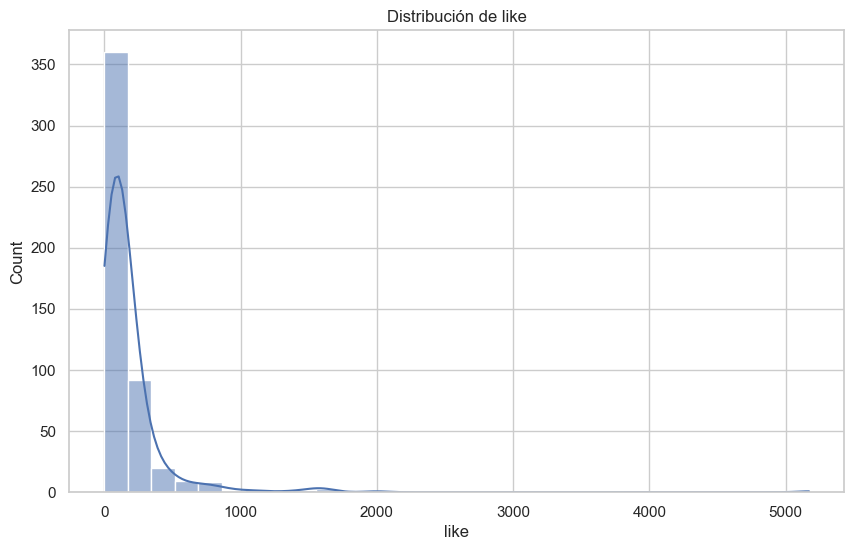

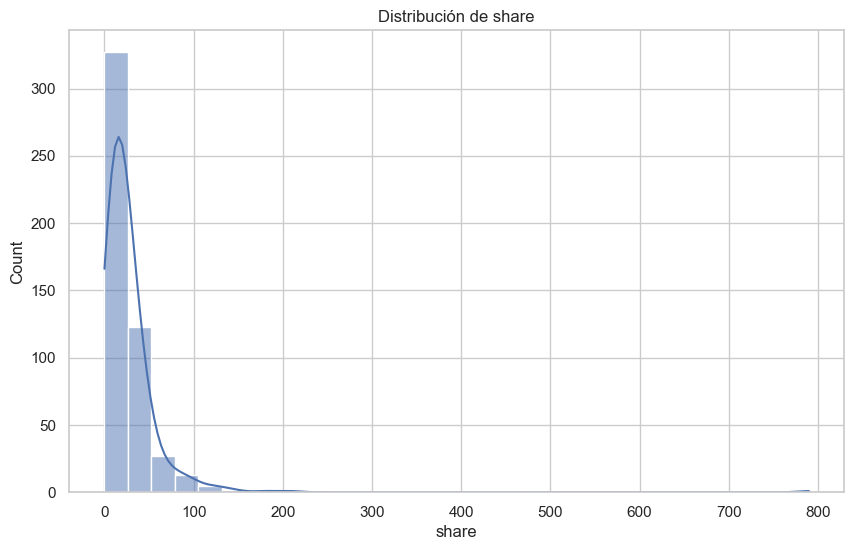

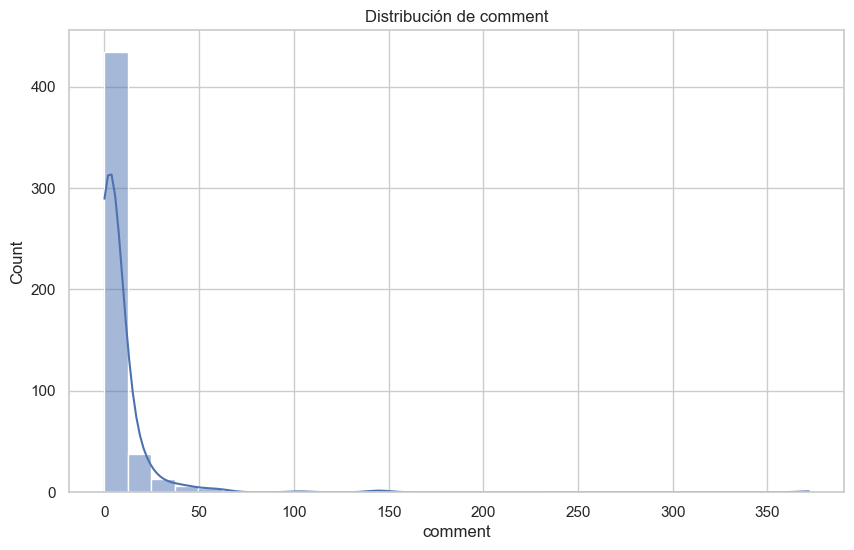

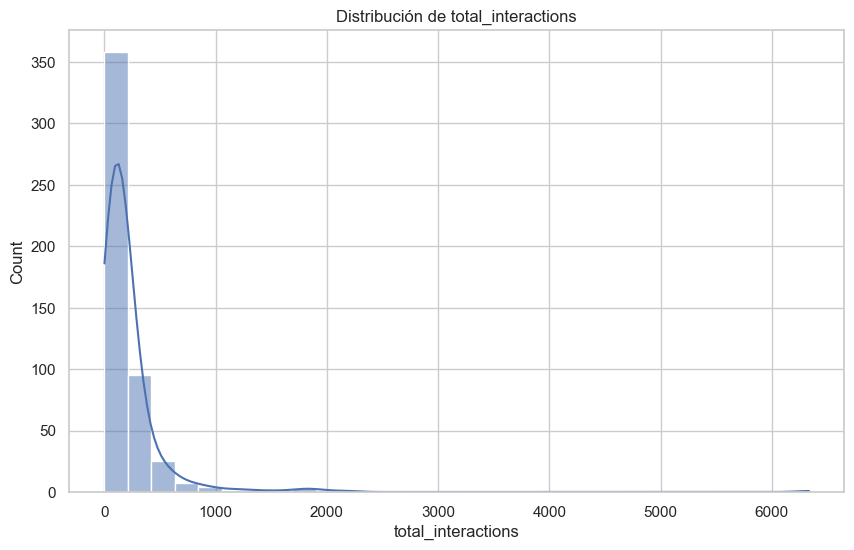

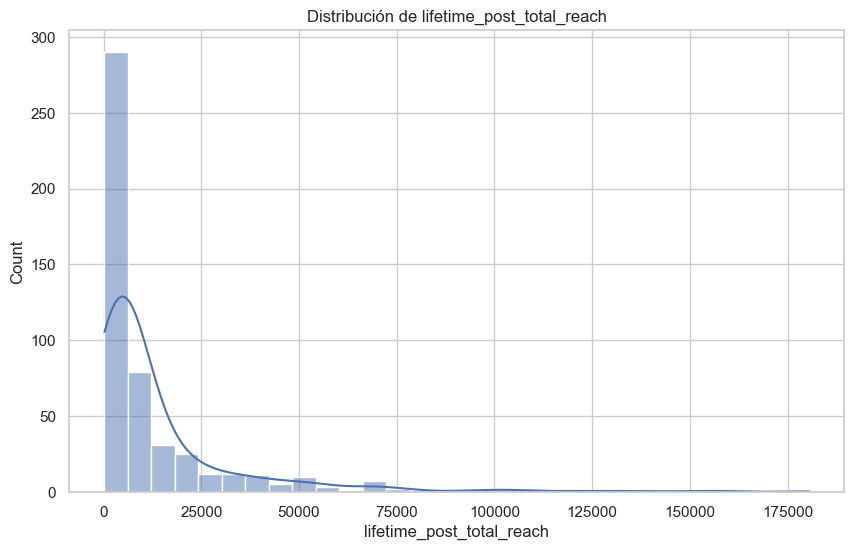

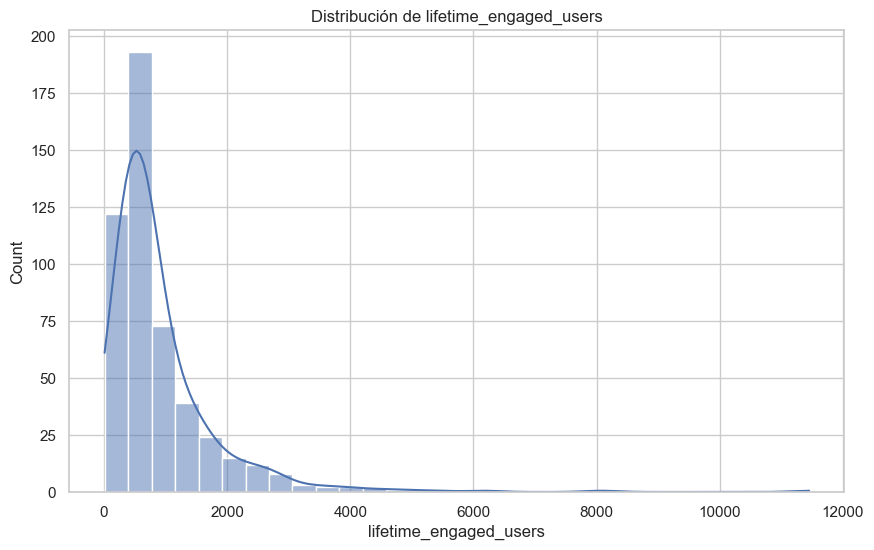

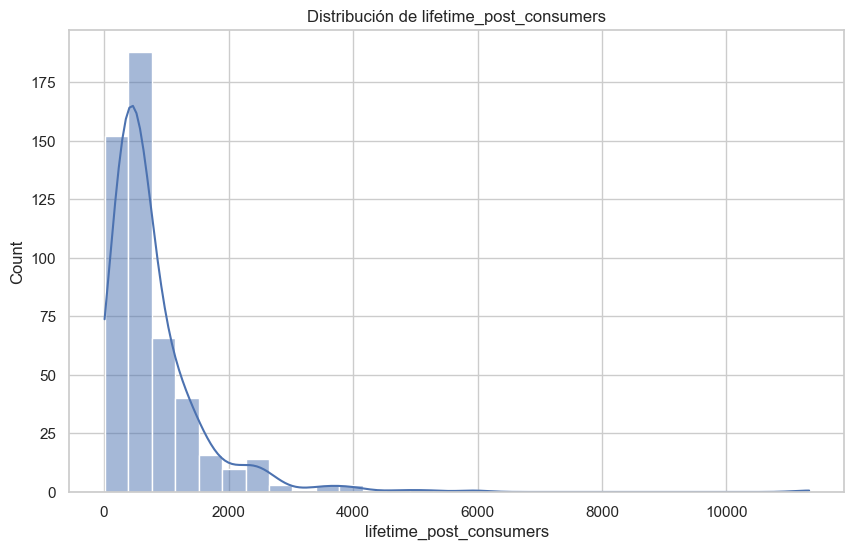

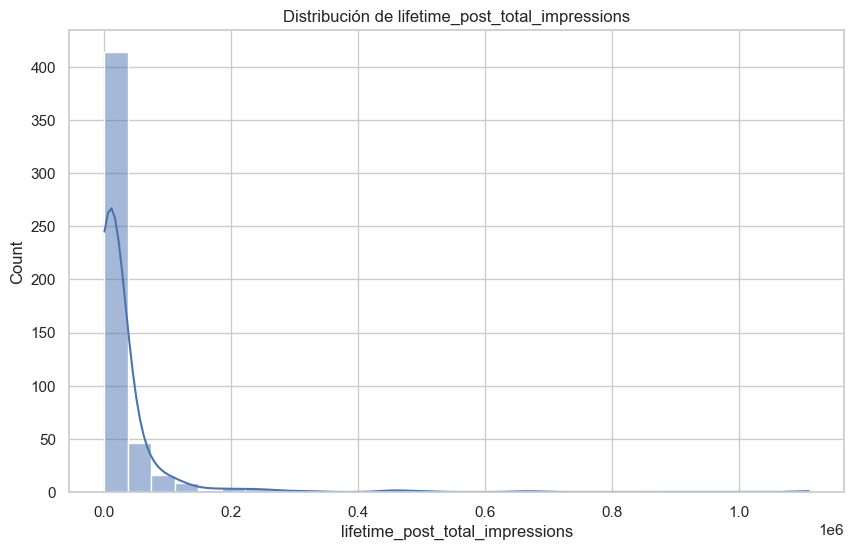

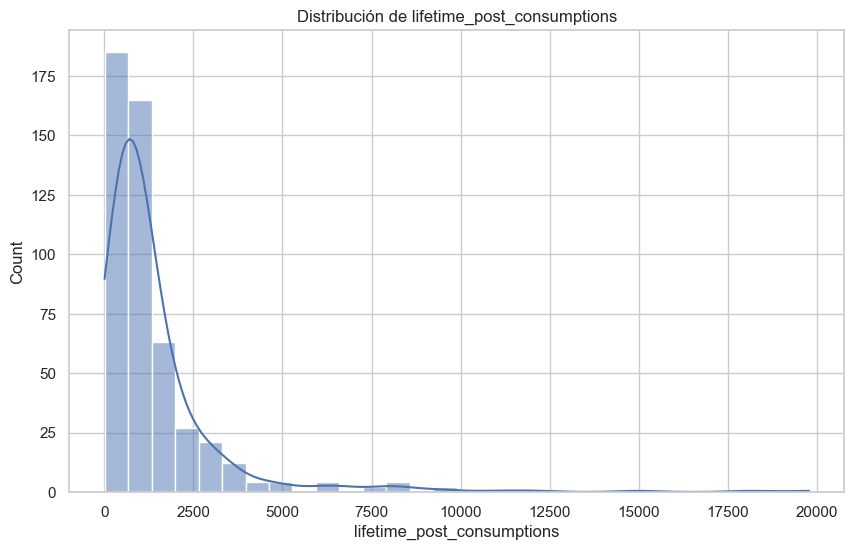

In [14]:
num_cols = ['like', 'share', 'comment', 'total_interactions', 'lifetime_post_total_reach', 'lifetime_engaged_users', 'lifetime_post_consumers', 'lifetime_post_total_impressions', 'lifetime_post_consumptions']

for col in num_cols:
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribución de {col}")
    plt.show()

**Interacciones: `like`, `comment`, `share`, `total_interactions`**

- Todas las variables presentan una alta concentración de valores bajos, lo que indica que la mayoría de las publicaciones generan pocas interacciones.
- Se observan outliers marcados: publicaciones con miles de likes o interacciones. Estos outliers son interesantes de analizar para la marca.

---

**Alcance e impresiones: `lifetime_post_total_reach`, `lifetime_post_total_impressions`** 

- Distribuciones muy similares a las anteriores, con valores típicamente bajos y una cola larga hacia la derecha.
- Algunos posts llegaron a más de 100.000 personas, lo que representa casos de viralidad fuera de la norma, y de nuevo son el objetivo de la marca, y por tanto su foco de estudio.

---

**Engagement y consumo: `lifetime_engaged_users`, `lifetime_post_consumers`, `lifetime_post_consumptions`**

- La mayoría de publicaciones tienen poco engagement directo.
- Existen varios extremos con valores de usuarios comprometidos o consumidores muy altos.

---

### Conclusiones generales:

- Estas variables no siguen una distribución normal, habrá que tenerlo en cuenta en el modelado.
- Los outliers son muy valiosos, pues representan posibles publicaciones exitosas, por lo que, vamos a analizarlas a parte.



## Comparación entre publicaciones virales vs no virales

En este caso, las publicaciones virales se corresponden con los outliers del dataset. Para separarlos del resto de datos, vamos a utilizar el percentil 95 de `total_interactions`, que nos permite aislar el 5% superior de publicaciones con más interacciones, que serán 25 (puesto que nuestra base de datos cuenta con 500 observaciones)

In [28]:
# definimos P95
p95 = df['total_interactions'].quantile(0.95)

# creamos una nueva columna que indique si el post es viral o no y lo guardamos en otro df
df_viral = df.copy()
df_viral['viral'] = df_viral['total_interactions'] > p95
df['viral'] = df['total_interactions'] > p95 # lo añadimos al df original para seguir usándolo

# guardamos el nuevo df
viral_path = "/Users/elena/Downloads/Data_science/proyectos/proyecto_I/interacciones-Facebook/data/dataset_viral.csv"
df_viral.to_csv(viral_path, index=False)

# agrupamos por 'viral' y calculamos las proporciones relativas por categoría de mayor a menor
comparativo = df.groupby('viral').agg({
    'type': lambda x: x.value_counts(normalize=True).to_dict(),
    'post_hour': lambda x: x.value_counts(normalize=True).to_dict(),
    'post_weekday': lambda x: x.value_counts(normalize=True).to_dict(),
    'paid': lambda x: x.value_counts(normalize=True).to_dict()
}).T
print(p95)
print(comparativo)

605.8499999999992
viral                                                     False  \
type          {'Photo': 0.8463157894736842, 'Status': 0.0926...   
post_hour     {3: 0.2063157894736842, 10: 0.1515789473684210...   
post_weekday  {7: 0.16842105263157894, 6: 0.1663157894736842...   
paid          {0.0: 0.728421052631579, 1.0: 0.27157894736842...   

viral                                                     True   
type                            {'Photo': 0.96, 'Status': 0.04}  
post_hour     {3: 0.28, 10: 0.24, 13: 0.16, 12: 0.08, 5: 0.0...  
post_weekday  {1: 0.24, 4: 0.2, 5: 0.16, 2: 0.12, 3: 0.12, 6...  
paid                                       {0.0: 0.6, 1.0: 0.4}  


Se han identificado 25 publicaciones virales con más de 605 interacciones (percentil 95). Vamos a ver las diferencias más relevantes respecto al resto de posts:

#### `type` Tipo de publicación 
- **Virales:** 96% photo, 4% status.
- **No virales:** 84.6% Photo, 9.3% Status.
- **Conclusión:** Las publicaciones virales tienden a ser prácticamente casi todas de tipo foto.

#### `post_hour` Hora de publicación 
- **Virales:** Se concentran en 3 franjas:
  - 3h: 28%
  - 10h: 24%
  - 13h: 16%
- **No virales:** Más distribuidas, pero también destacan 3h (20.6%) y 10h (15,2%).
- **Conclusión:** Las horas más efectivas para publicaciones son: 3h, 10h y 13h.

#### `post_weekday` Día de publicación 
- **Virales:** Mayor presencia los lunes (24%), jueves (20%) y viernes (16%).
- **No virales:** Mayor presencia los fines de semana: domingo (16.8%) y sábado (16.6%).
- **Conclusión:** Puede haber ciertos días estratégicos para obtener mayor interacción, como los lunes o jueves.

#### `paid` Publicaciones promocionadas 
- **Virales:** El 40% están promocionadas.
- **No virales:** Solo 27% son promocionadas.
- **Conclusión:** La promoción aumenta la probabilidad de que una publicación se vuelva viral, aunque no es indispensable.

## Comparación de interacciones por día de la semana

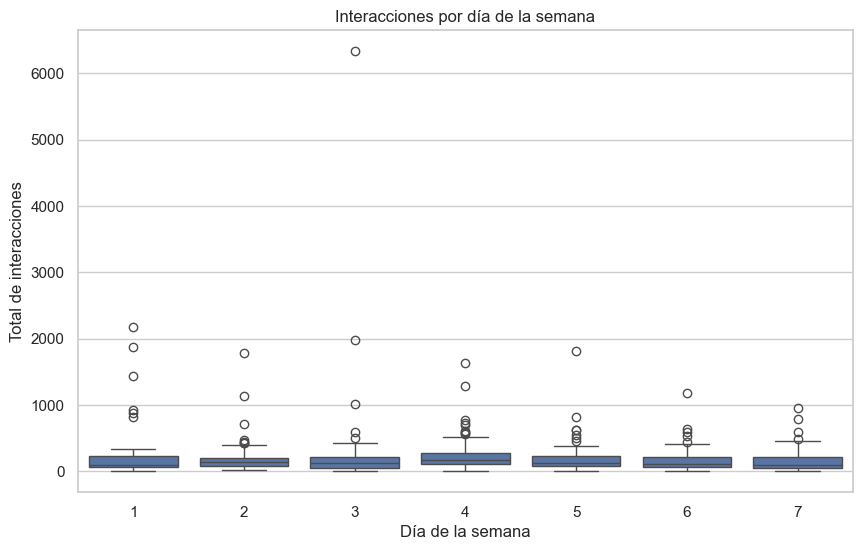

In [26]:
# boxplot de las interacciones en función del día de la semana
sns.boxplot(data=df, x='post_weekday', y='total_interactions')
plt.title("Interacciones por día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Total de interacciones")
plt.show()

- La distribución parece ser bastante similar entre días, la mediana de interacciones no varía drásticamente de un día a otro. Parece entonces que, en promedio, el día de la semana no tiene un gran impacto en el número de interacciones.

- Hay presencia de outliers en todos los días. Esto indica que pueden darse post virales cualquier día de la semana. Sin embargo, el miércoles tiene un outlier muy por encima del resto.

A primera vista, no parece haber grandes diferencias en las interacciones entre los días de la semana. Las publicaciones con alto alcance pueden ocurrir en cualquier día. Sin embargo, más adelante confirmaremos esta impresión con un test estadístico.

## Análisis de interacciones según tipo de publicación y franja horaria

In [24]:
df.groupby('type')[['like', 'comment', 'share', 'total_interactions']].mean().sort_values('total_interactions', ascending=False)

,like,comment,share,total_interactions
type,,,,
Video,231.428571,12.285714,52.142857,295.857143
Status,176.711111,8.911111,31.422222,217.044444
Photo,182.183099,7.492958,26.903756,216.579812
Link,73.318182,2.818182,12.909091,89.045455


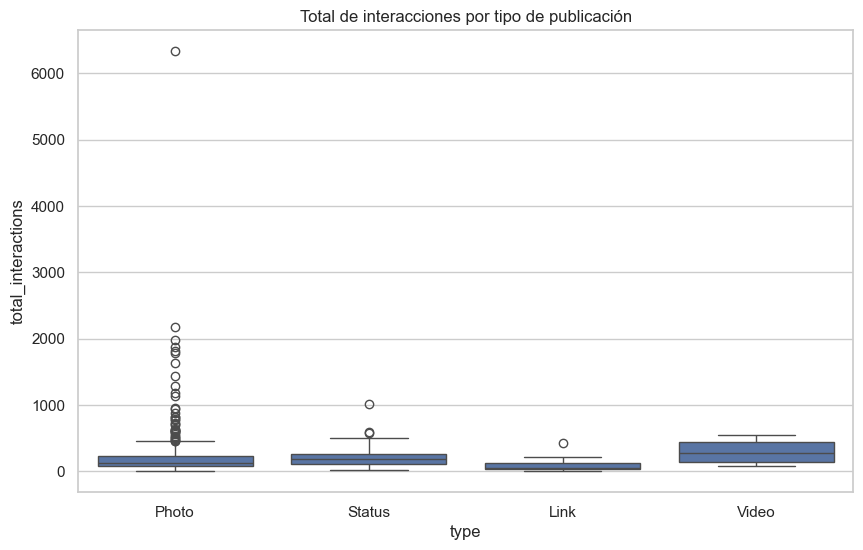

/var/folders/gs/26000r592n9fn9v0kpbm0z5m0000gp/T/ipykernel_94296/1213171945.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('post_hour')['total_interactions'].mean().plot(kind='bar')


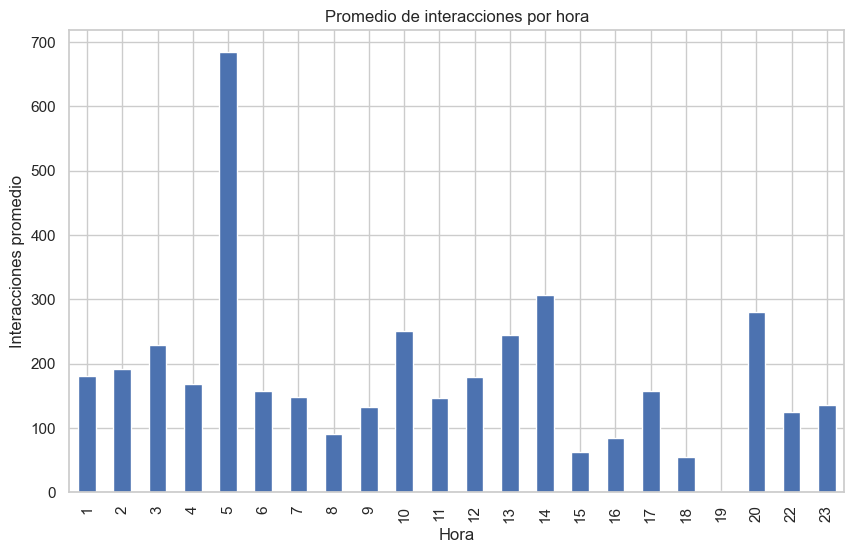

In [20]:
sns.boxplot(data=df, x="type", y="total_interactions")
plt.title("Total de interacciones por tipo de publicación")
plt.show()

df.groupby('post_hour')['total_interactions'].mean().plot(kind='bar')
plt.title("Promedio de interacciones por hora")
plt.ylabel("Interacciones promedio")
plt.xlabel("Hora")
plt.show()

#### Total de interacciones por tipo de publicación

En la tabla inicial vemos que:
- Los vídeos son el tipo de publicación con mayor rendimiento promedio en todas las métricas de interacción. Aunque se usan menos que las fotos, generan más likes, comentarios, shares y total de interacciones.
- Fotos y estados están muy igualados en cuanto a total medio de interacciones. 
- Los enlaces (Link) son el tipo de contenido menos efectivo en términos de interacción.

El boxplot muestra la distribución del total de interacciones (`total_interactions`) según el tipo de publicación (`type`).

- Las fotos son las que muestran una gran cantidad de outliers positivos, es decir, posts virales, lo que refuerza la conclusión del punto anterior.
- Los videos también muestran un rendimiento superior al promedio del resto de tipos, aunque solo en media y no en dispersión (viralidad).
- Los links tienden a generar menos interacciones tanto en promedio como en dispersión.

---

#### Promedio de interacciones por hora
Este gráfico representa el promedio de interacciones agrupadas por hora del día (`post_hour`).

- Las 5 am presenta un pico atípico, con una media superior a 680 interacciones por publicación. Es un horario poco común, pero tiende a generar más interacciones. Esto podría deberse a audiencias globales y una menor competencia de contenido en el feed.
- Otras horas destacadas por su rendimiento:
  - 14h, 20h , 10h y 13h también tienen promedios elevados.
- La franja entre las 15h y 18h parecen tener un peor rendimiento relativo.

## Relación entre  promoción y rendimiento

/var/folders/gs/26000r592n9fn9v0kpbm0z5m0000gp/T/ipykernel_94296/2013759409.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x='paid', y='total_interactions', estimator='mean', ci='sd', palette='Set2')
/var/folders/gs/26000r592n9fn9v0kpbm0z5m0000gp/T/ipykernel_94296/2013759409.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='paid', y='total_interactions', estimator='mean', ci='sd', palette='Set2')


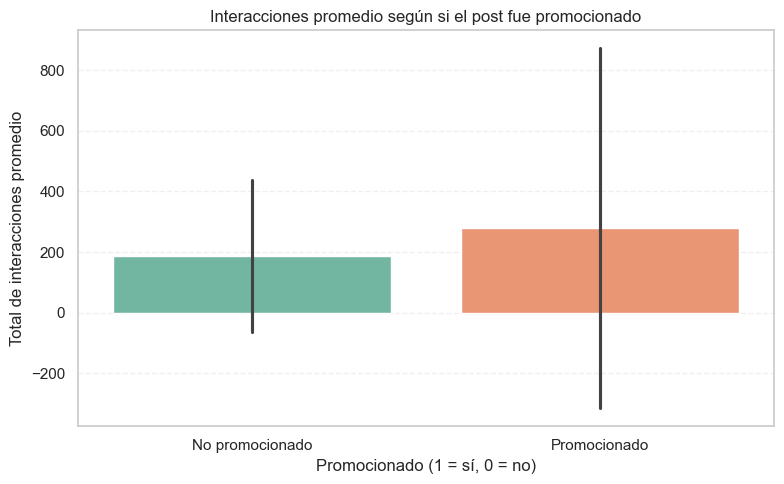

In [25]:
# creamos el gráfico de barras: promedio de interacciones según promoción
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='paid', y='total_interactions', estimator='mean', ci='sd', palette='Set2')

plt.title('Interacciones promedio según si el post fue promocionado')
plt.xlabel('Promocionado (1 = sí, 0 = no)')
plt.ylabel('Total de interacciones promedio')
plt.xticks([0, 1], ['No promocionado', 'Promocionado'])
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

Este gráfico muestra el promedio de interacciones (`total_interactions`) en función de si la publicación fue promocionada (`paid = 1`) o no (`paid = 0`).

- Las publicaciones promocionadas presentan un promedio de interacciones más alto que las publicaciones no promocionadas.
- También muestran una mayor dispersión, lo que indica que algunas publicaciones promocionadas obtuvieron un número muy elevado de interacciones, mientras que otras no tuvieron tanto impacto. La promoción no garantiza éxito, ya que también introduce mayor variabilidad.
- Las publicaciones no promocionadas tienen una media más baja, pero también más estabilidad en los resultados. El contenido orgánico tiene resultados más moderados pero también más consistentes.

### Matriz de correlación entre variables numéricas

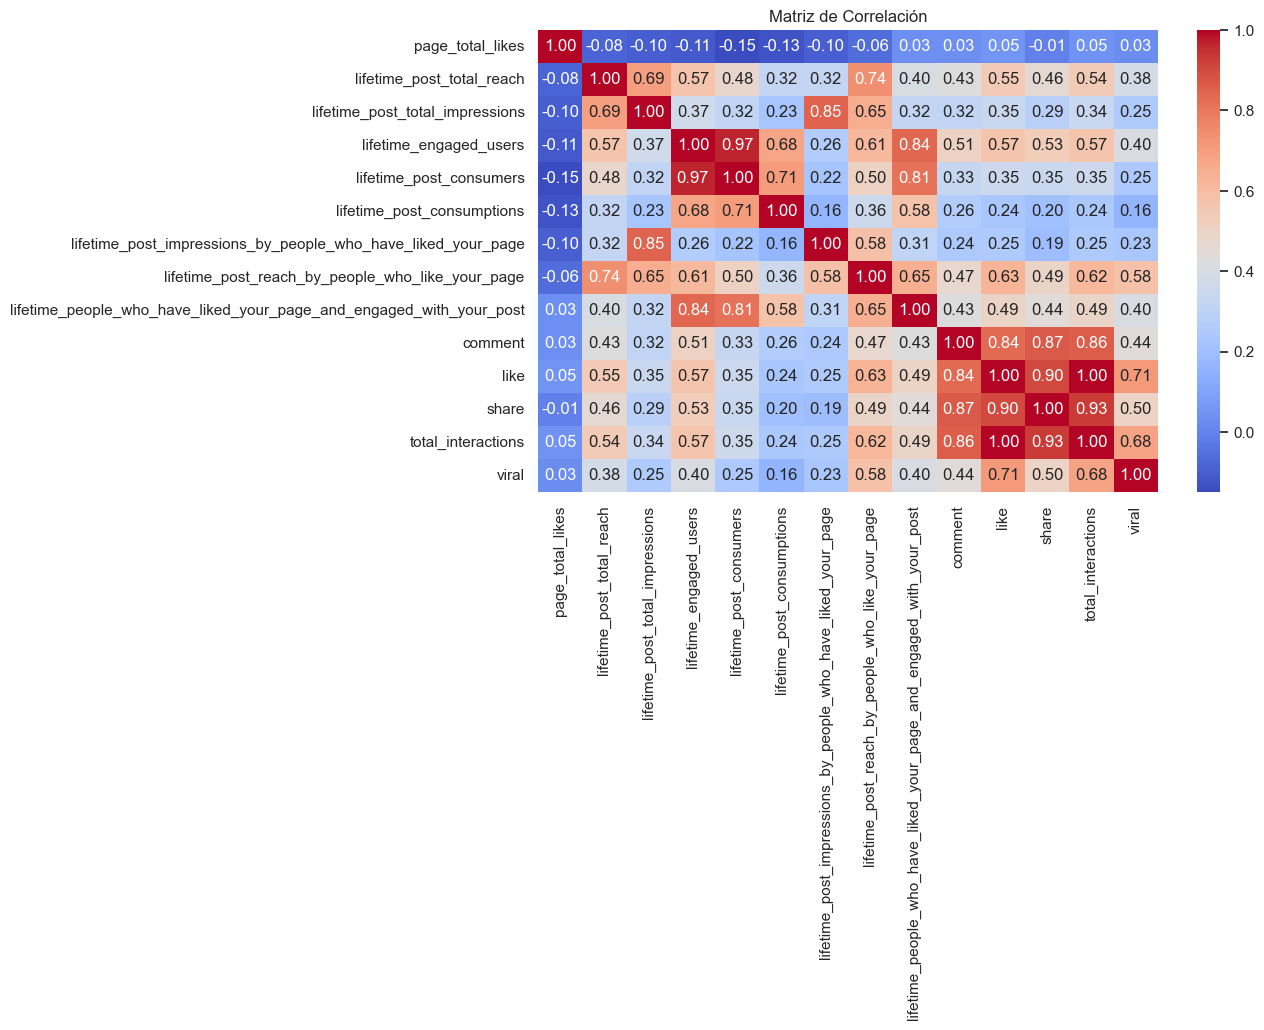

In [22]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

#### Correlaciones más fuertes
- `total_interactions` está altamente correlacionado con:
  - `like` (rho = 0.93)
  - `comment` (rho = 0.86)
  - `share` (rho = 0.71)
- Esto era obvio, ya que el total de interacciones es la suma de las otras tres.

#### Compromiso del usuario
- `lifetime_engaged_users`, `lifetime_post_consumers` y `lifetime_post_consumptions` tienen correlaciones superiores al 0.9 entre sí.
- Indican comportamientos similares y podrían agruparse o reducirse.

#### Correlación con viralidad
- `viral` tiene correlación más fuerte con `like` (rho = 0.71)
- Tiene baja correlación con el número total de likes de la página (`page_total_likes`), lo que indica que el tamaño de la comunidad no asegura el éxito de una publicación.

## Conclusiones del Análisis Exploratorio (EDA)

Tras realizar un análisis exhaustivo del dataset de publicaciones de Facebook, se pueden destacar las siguientes conclusiones clave:

- **Tipo de publicación:** Las publicaciones en formato **Photo** son las más frecuentes, pero los videos generan el mayor promedio de interacciones, aunque no tiene tantos casos virales como las fotos. Los enlaces (`Link`) son el tipo menos efectivo.

- **Horario de publicación:** Horas atípicas como las **5:00 am** y las franjas entre **10h y 14h** presentan los mayores promedios de interacción, lo que puede ser una oportunidad estratégica de publicación.

- **Día de publicación:** Los lunes y jueves concentran una mayor proporción de publicaciones virales, lo cual podría vincularse a patrones de consumo de contenido.

- **Promoción:** Las publicaciones promocionadas tienden a obtener más interacciones, pero con una alta variabilidad. Esto indica que el efecto de la promoción depende en gran medida de la calidad del contenido.

- **Interacciones y viralidad:** Las variables más correlacionadas con la viralidad son `like`, `comment`, y `share`. Sin embargo, el tamaño de la página (`page_total_likes`) no está relacionado con el éxito de una publicación.

- **Publicaciones virales:** El 5% de las publicaciones con más interacciones comparten características comunes: son casi siempre Photos, suelen publicarse temprano por la mañana y tienen más probabilidades de haber sido promocionadas.
